## Load Titanic DataSet

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Data Cleaning

In [4]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic['age'].fillna(titanic['age'].mean(), inplace=True)


C:\Users\shiv\AppData\Local\Temp\ipykernel_8972\948906033.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  titanic['age'].fillna(titanic['age'].mean(), inplace=True)


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

In [6]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


C:\Users\shiv\AppData\Local\Temp\ipykernel_8972\367046106.py:1: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: embarked, Length: 891, dtype: str

# Cleaned Data Verify

In [7]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

# Survived males&females

In [8]:
titanic.groupby('sex')['survived'].mean()


sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

# Passenger Class Affect Survival

In [9]:
titanic.groupby('pclass')['survived'].mean()


pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

# survival Rate by Age Group

In [10]:
bins = [0, 12, 18, 40, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Middle Age', 'Senior']

titanic['age_group'] = pd.cut(titanic['age'], bins=bins, labels=labels)


In [11]:
titanic.groupby('age_group')['survived'].mean()


age_group
Child         0.579710
Teen          0.428571
Adult         0.388235
Middle Age    0.390625
Senior        0.227273
Name: survived, dtype: float64

# Data Visualization (Bar Chart)

# Survival by Gender

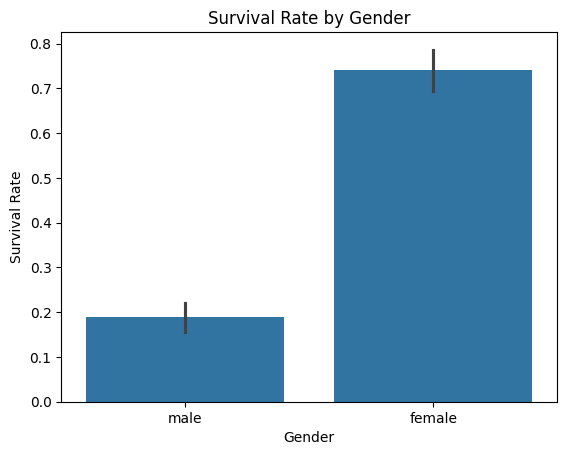

In [12]:
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.show()

# Survival by Passenger Class

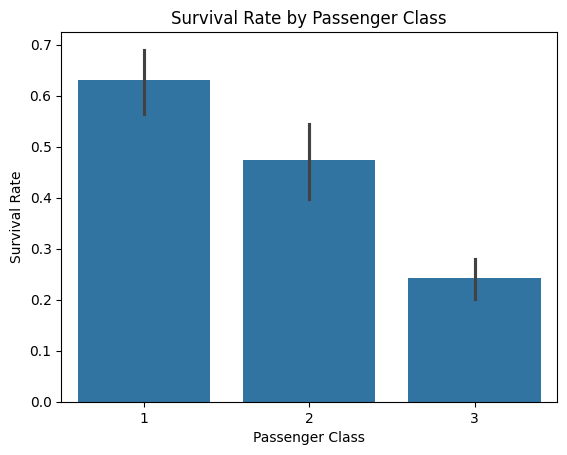

In [13]:
sns.barplot(x='pclass', y='survived', data=titanic)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

# Histogram – Passenger Age Distribution

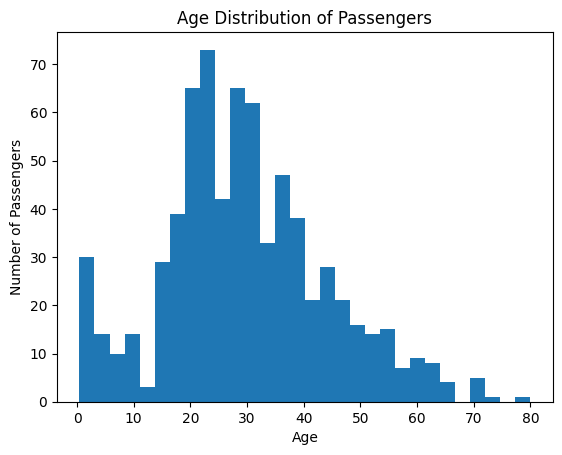

In [14]:
plt.hist(titanic['age'], bins=30)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.show()